<a href="https://colab.research.google.com/github/poojithavunnam/Brain_Tumor_Detection/blob/main/AI_Braintumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip brain.zip


Archive:  brain.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28 no.jpg  
  inflating: brain_t

In [ ]:
import os
os.listdir()


['.config',
 'brain.zip',
 'yes',
 'no',
 'brain_tumor_dataset',
 '.ipynb_checkpoints',
 'sample_data']

In [ ]:
os.listdir("brain_tumor_dataset")


['yes', 'no']

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
DATASET_PATH = "/content/brain_tumor_dataset"

IMG_SIZE = 224
BATCH_SIZE = 16


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [ ]:
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)


Found 203 images belonging to 2 classes.


In [ ]:
val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 50 images belonging to 2 classes.


In [ ]:
print(train_data.class_indices)


{'no': 0, 'yes': 1}


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9345 - loss: 0.2147 - val_accuracy: 0.9000 - val_loss: 0.3479
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9523 - loss: 0.1693 - val_accuracy: 0.8200 - val_loss: 0.4513
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9718 - loss: 0.1239 - val_accuracy: 0.8400 - val_loss: 0.3463
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9571 - loss: 0.1222 - val_accuracy: 0.8600 - val_loss: 0.3730
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9960 - loss: 0.0747 - val_accuracy: 0.8600 - val_loss: 0.3701
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9673 - loss: 0.0825 - val_accuracy: 0.8400 - val_loss: 0.3841
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9796 - loss: 0.0658 - val_accuracy: 0.9000 - val_loss: 0.3559
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 1.0000 - loss: 0.0450 - val_accuracy: 0.8600 - val_loss:

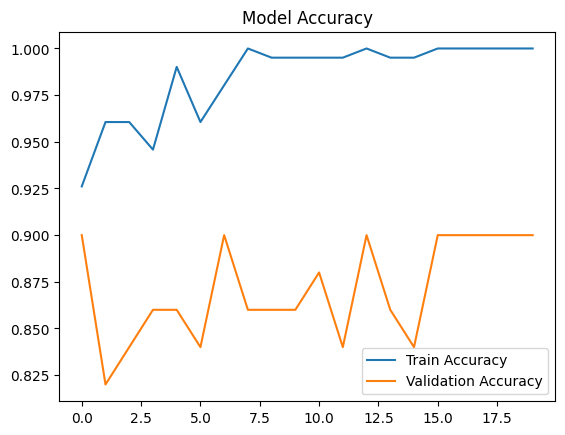

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [ ]:
model.save("brain_tumor_cnn_model.h5")


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    if prediction[0] > 0.5:
        print("🧠 Tumor Detected")
    else:
        print("✅ No Tumor Detected")


In [ ]:
predict_image("/content/brain_tumor_dataset/yes/Y1.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
🧠 Tumor Detected


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_preds = model.predict(val_data)
val_preds = (val_preds > 0.5).astype(int)

print(confusion_matrix(val_data.classes, val_preds))
print(classification_report(val_data.classes, val_preds))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step
[[ 7 12]
 [ 9 22]]
              precision    recall  f1-score   support

           0       0.44      0.37      0.40        19
           1       0.65      0.71      0.68        31

    accuracy                           0.58        50
   macro avg       0.54      0.54      0.54        50
weighted avg       0.57      0.58      0.57        50

